In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt 

In [2]:
data = pd.read_excel('26.4 Когортный анализ.xlsx')
data = pd.DataFrame(data)
data.head()

,user_id,date,price
0,A0005,2020-03-25,50
1,A0005,2020-03-25,40
2,A0005,2020-03-26,70
3,A0005,2020-03-27,20
4,A0005,2020-03-29,50


In [3]:
data.isnull().sum()

user_id    0
date       0
price      0
dtype: int64

In [4]:
data['date'] = pd.to_datetime(data['date'])
data['month_year'] = data['date'].apply(lambda x: dt.datetime(x.year, x.month, 1))
data['cohortMonth'] = data.groupby('user_id')['month_year'].transform('min')

In [6]:
def get_date(df,column):
    year=df[column].dt.year
    month=df[column].dt.month
    day=df[column].dt.day
    return year,month,day

In [7]:
date_year, date_month, _ = get_date(data, 'date')
cohort_year, cohort_month, _ = get_date(data, 'cohortMonth')
year_diff = date_year - cohort_year
month_diff = date_month - cohort_month
data['cohort_index'] = year_diff * 12 + month_diff + 1

In [8]:
cohort_counts = data.groupby(['cohortMonth', 'cohort_index'])['user_id'].nunique().reset_index()

cohort_matrix = cohort_counts.pivot(index='cohortMonth', columns='cohort_index', values='user_id')

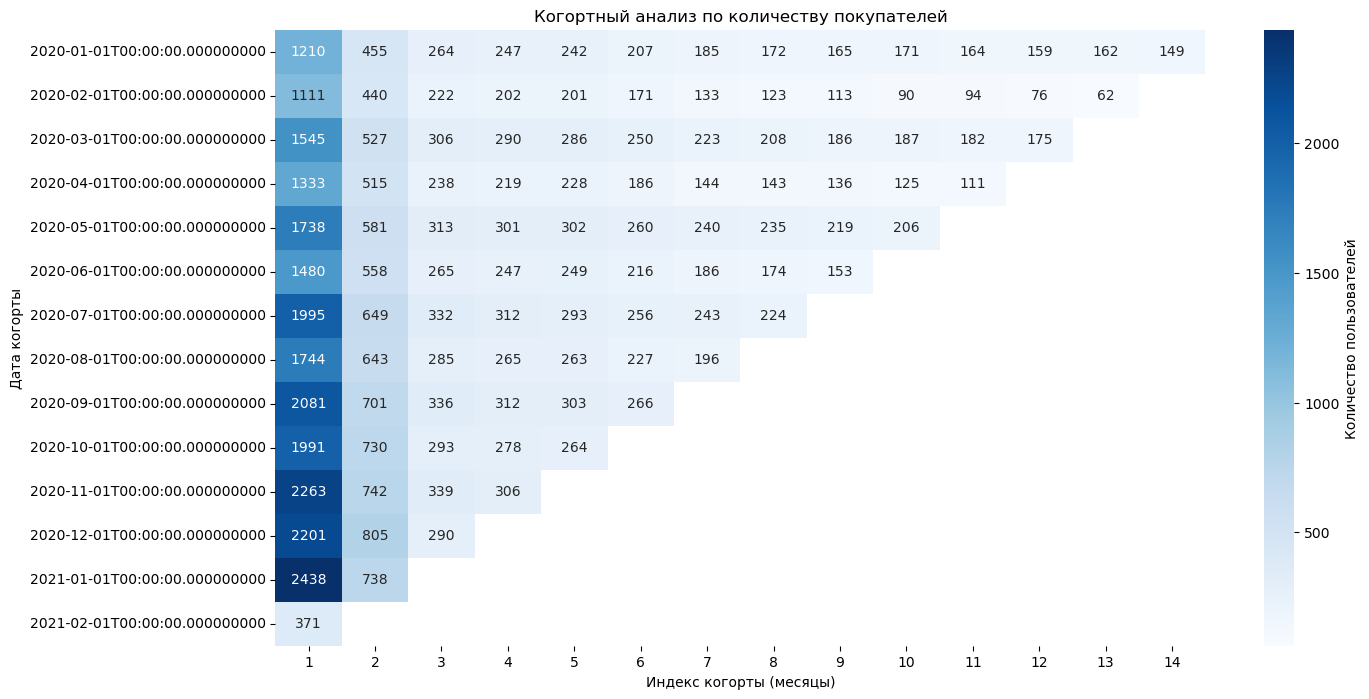

In [9]:
plt.figure(figsize=(15, 8))
sns.heatmap(cohort_matrix, cmap='Blues', annot=True, fmt='g', cbar_kws={'label': 'Количество пользователей'})
plt.xlabel('Индекс когорты (месяцы)')
plt.ylabel('Дата когорты')
plt.title('Когортный анализ по количеству покупателей')
plt.show()

Ну что я могу тут сказать. Виден тенденция роста новых пользователей с каждым месяцем(+-). Думаю на это могла повлиять хорошая маркетинговая компания привлекающий новых клиентов. Но удержать клиента оказалась для них сложнее, и мы видим что покупки от этих же пользователей все меньше и меньше. Не знаю отрасль этой компании и что они покупают, но возможно пользователи купили что-то значительное, а потом покупают лишь дополнения. Или может что-то отпугнуло в сервисе и после одной покупки большинство пользователей не очень то и горят желанием приобретать что либо тут

In [13]:
cohort_revenue = data.groupby(['cohortMonth', 'cohort_index'])['price'].sum().reset_index()

cohort_matrix_revenue = cohort_revenue.pivot(index='cohortMonth', columns='cohort_index', values='price')

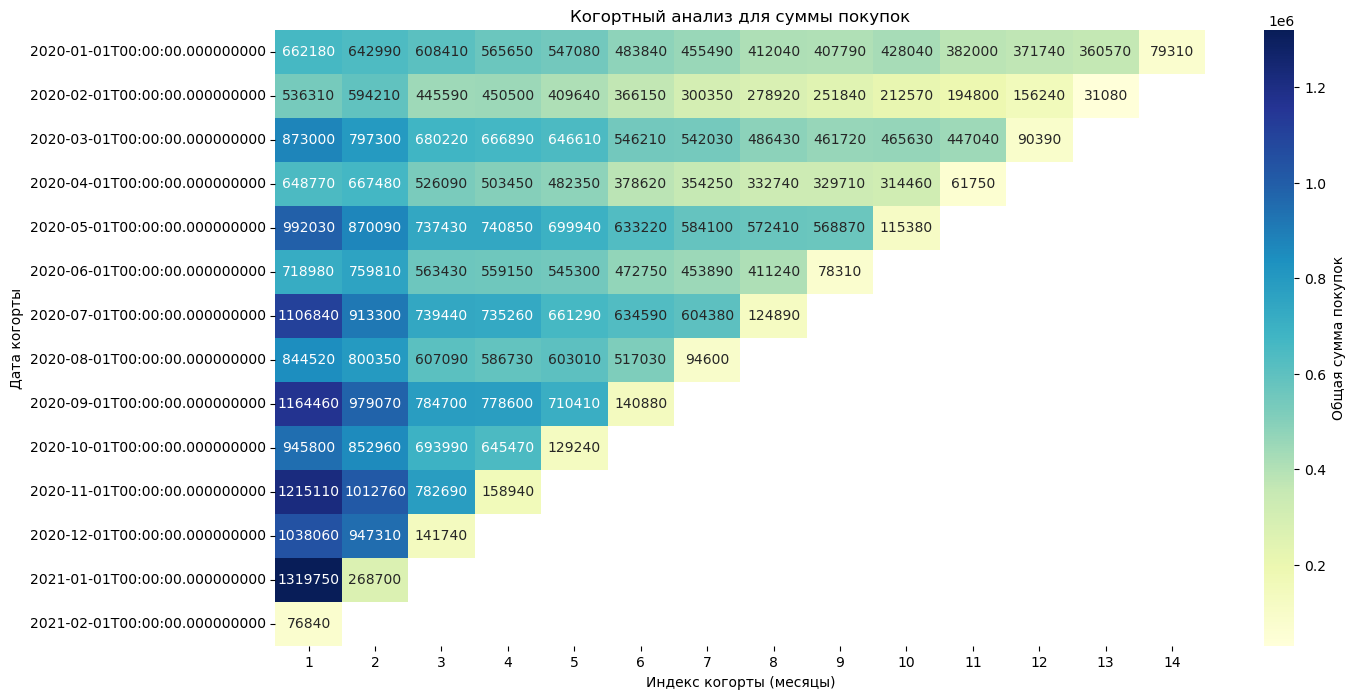

In [14]:
plt.figure(figsize=(15, 8))
sns.heatmap(cohort_matrix_revenue, cmap='YlGnBu', annot=True, fmt='.0f', cbar_kws={'label': 'Общая сумма покупок'})
plt.xlabel('Индекс когорты (месяцы)')
plt.ylabel('Дата когорты')
plt.title('Когортный анализ для суммы покупок')
plt.show()

По графику сумм покупок можно сказать что хоть и пользователей становится все меньше в разы, но суммы покупок идут на спад не так сильно. Заметно что даже оставшиеся покупатели охотно делают покупки и уход одних пользователи не так сильно отражаются по выручке благодаря наплыву новых. Из графика выделяются покупатели оформившие первую покупку в феврале. Ну что с них взять - Водолеи.(Просто глупая шутка исполняющий функцию воды, потому что я даже не знаю какие еще выводы можно сделать по данным анализа)

P.S. Я помню что февраль 2021 года не заполнен до конца. Я бы мог удалить все строки которые содержат 2021-02, но не видел в этом смысла